# CENSUS INCOME PROJECT

Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker
(Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted
using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
The prediction task is to determine whether a person makes over $50K a year

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent 
estimates of the civilian non-institutional population of the US.
These are prepared monthly for us by Population Division here at the Census Bureau. 
We use 3 sets of controls. 

These are:
1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

Step-1 Loading libraries and dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importing dataset
url = ("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df = pd.read_csv(url)

# Descriptive analysis

In [3]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)

In [7]:
# Preview dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
# Showing the Shape of dataset
df.shape

(32560, 15)

- Here we can see Rows of 32560 and Colums of 15

In [11]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [22]:
# Check for null values
round(df.isnull().sum()) 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

* great we can see null values all are Zero

In [24]:
# Checking the counts of label categories
Income = df['Income'].value_counts(normalize=True)
round(Income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

##### Observations:
    
- The dataset doesn't have any null values, but it contains missing values in the form of '?' which have to be preprocessed.

- The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

# Exploratory Data Analysis (EDA)

### Univariate Analysis

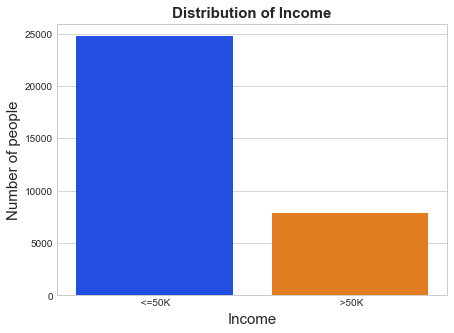

In [30]:
# Creating a barplot for 'Income'

Income = df['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(Income.index, Income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

* From the grapgh we can see 7500 people we can see >50k and 24000 people have <=50k

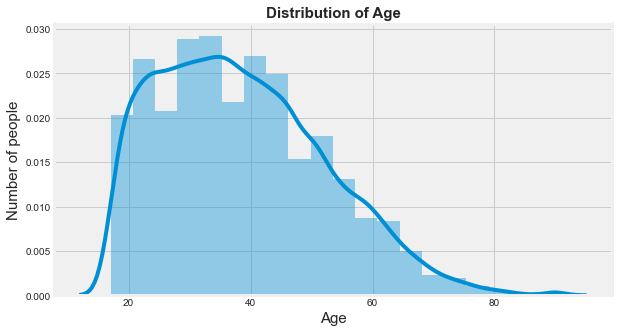

In [31]:
# Creating a distribution plot for 'Age'

Age     = df['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dt['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

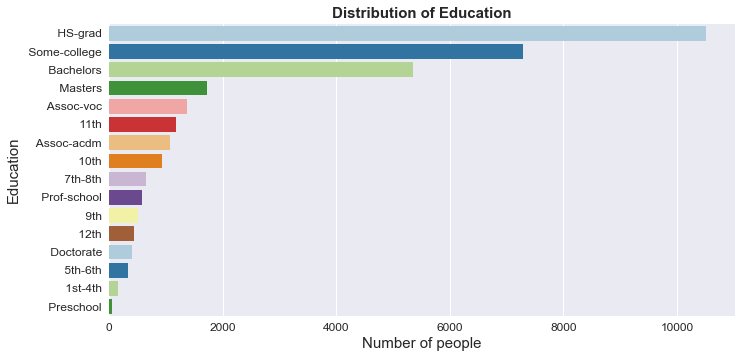

In [33]:
#  Now Creating a barplot for 'Education'

edu = df['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()


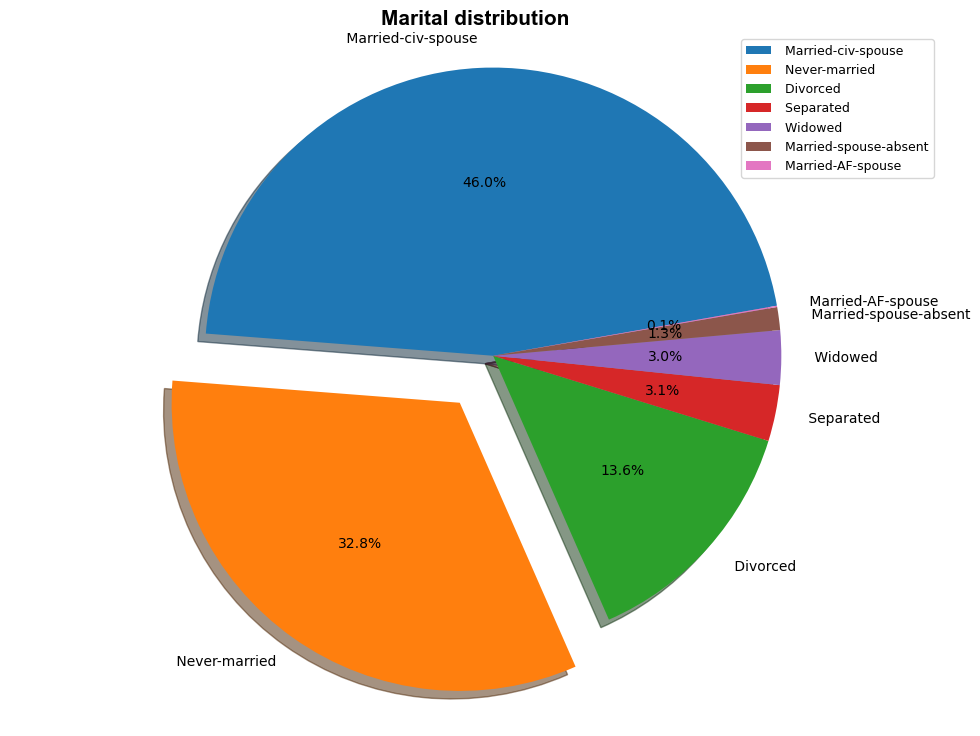

In [34]:
# Creating a pie chart for 'Marital status'

marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(12, 9))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 9})
plt.axis('equal')
plt.show()

* From the Graph we can see the various percentages of people categories

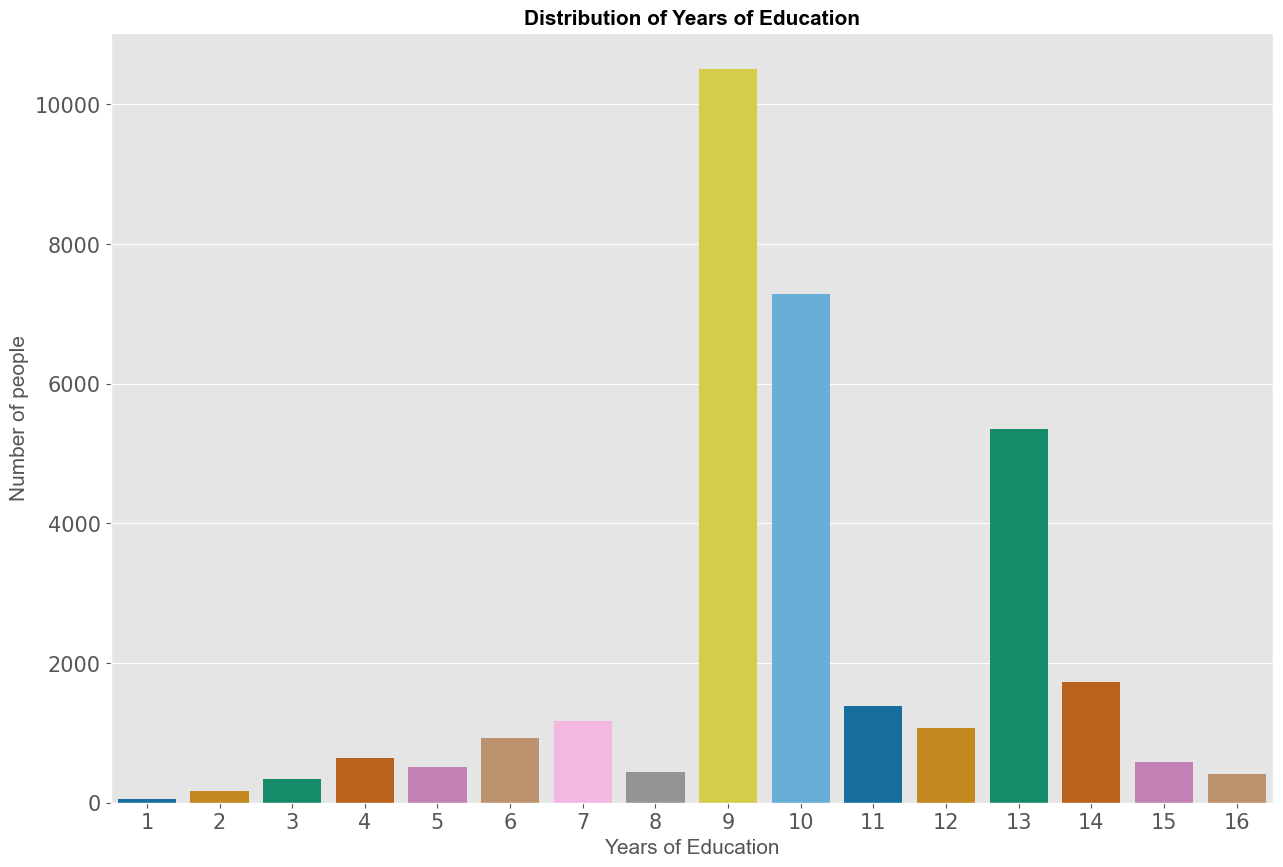

In [36]:
# Creating a barplot for 'Years of Education'

edu_num = df['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
sns.barplot(edu_num .index, edu_num .values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.show()

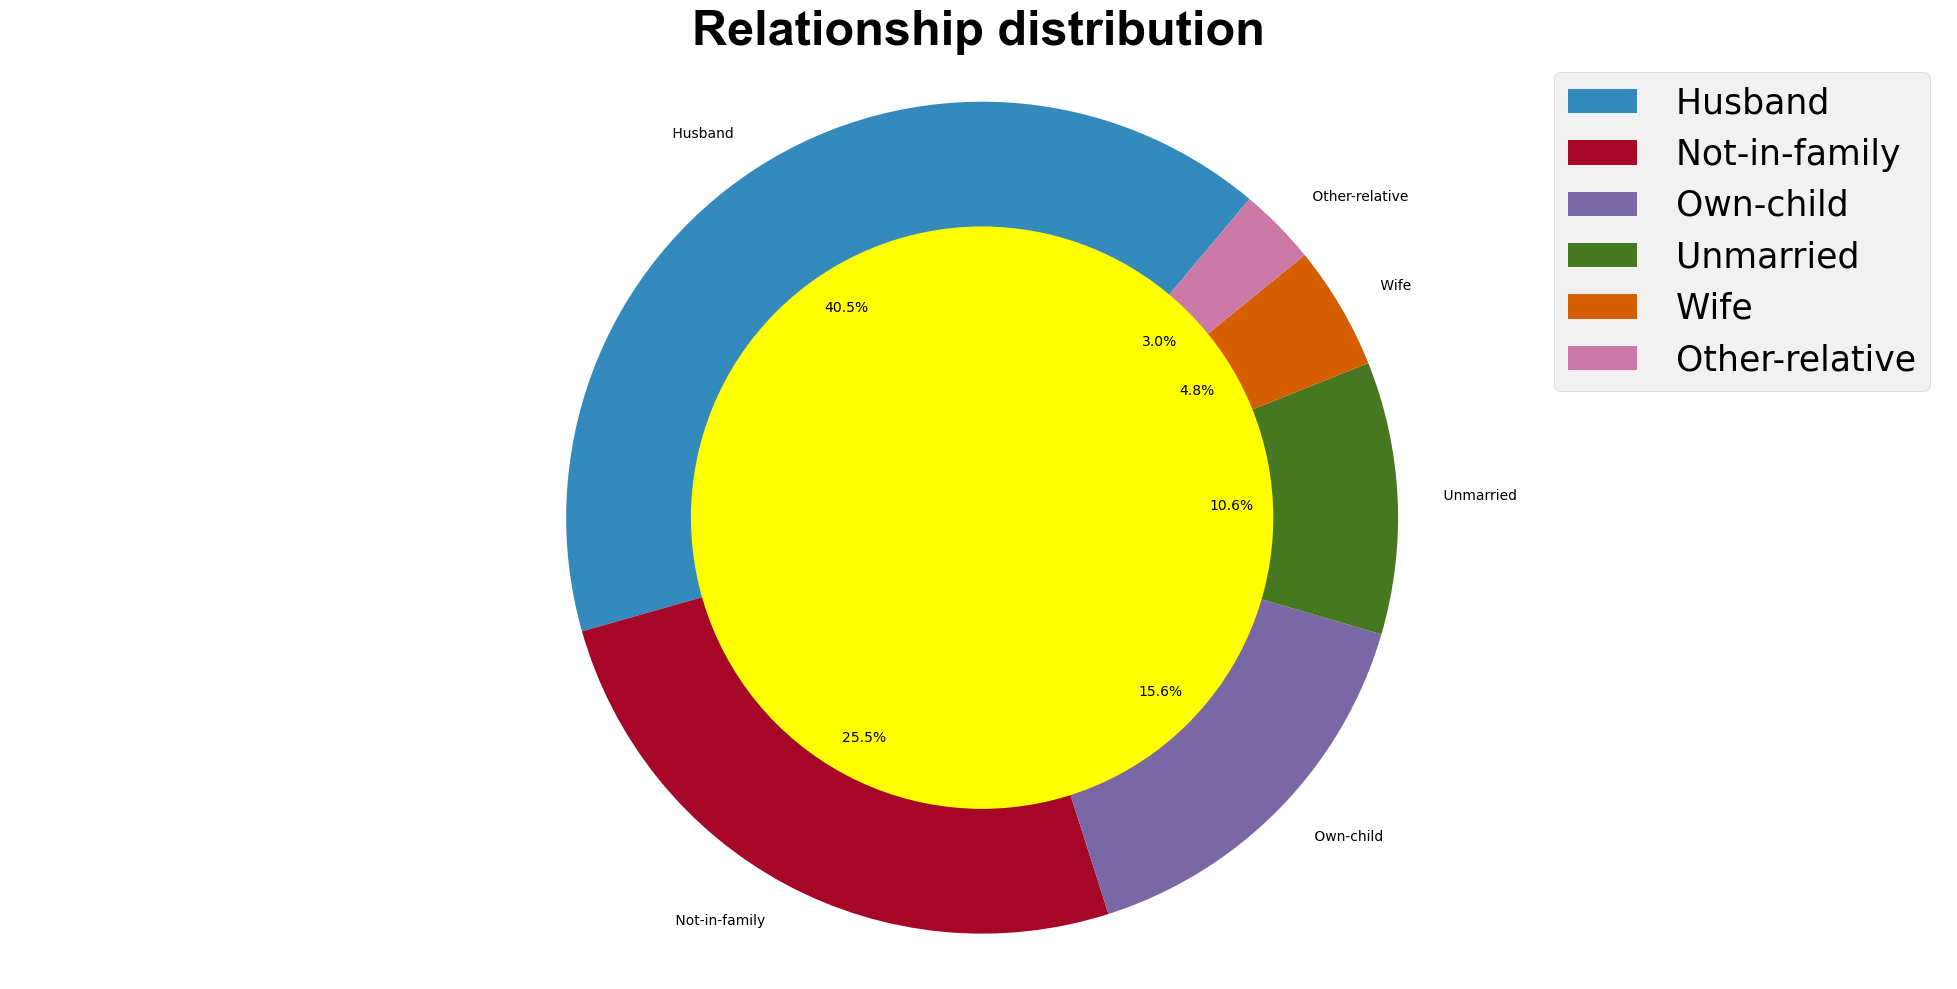

In [37]:
# Creating a donut chart for 'Relationship '
relation = df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(25, 12))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='yellow')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Arial', 'fontsize': 35, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 25})
plt.show()

* We can see various Relationship infromation details n the abpve graph

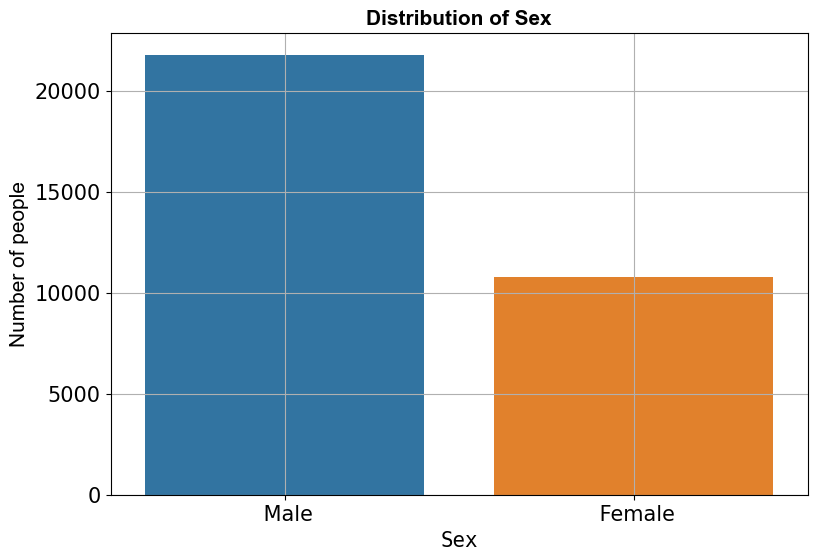

In [38]:
# Creating a barplot for 'Sex'
sex = df['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(9, 6))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.grid()
plt.show()

In [90]:
! pip install squarify

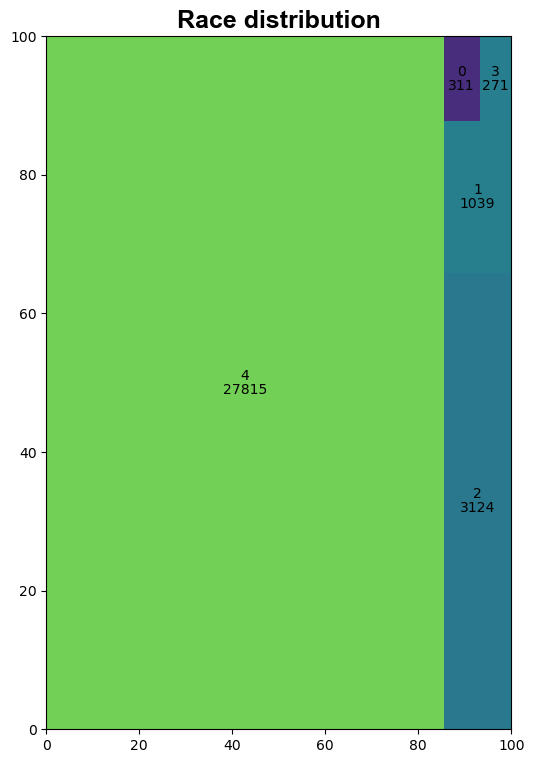

In [91]:
# Creating a Treemap for 'Race'

import squarify
race = df['Race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(6, 9))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Arial', 'fontsize': 18, 'fontweight': 'bold'})
plt.show()

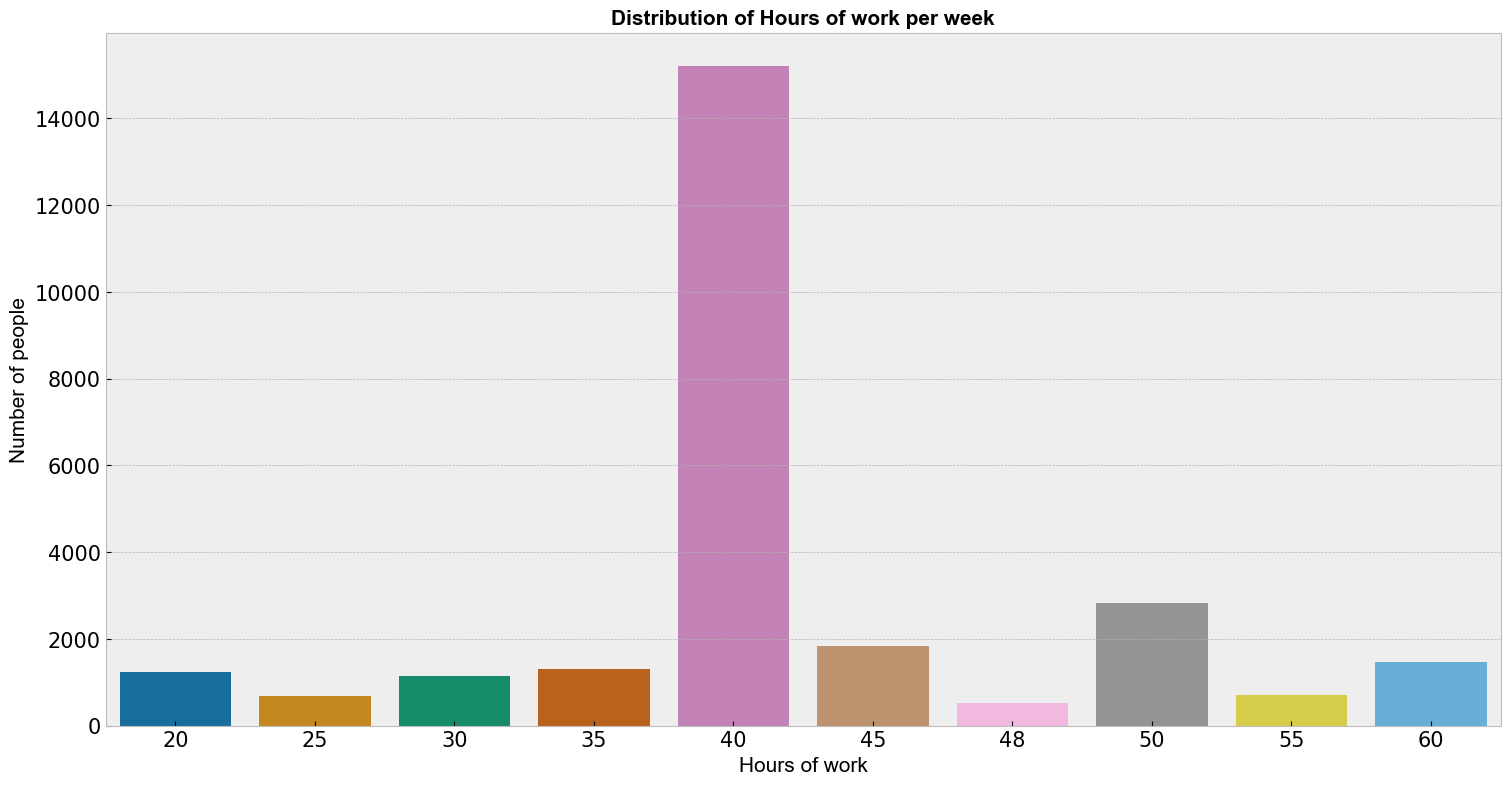

In [41]:
# Creating a barplot for 'Hours per week'

hours = df['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(18, 9))
sns.barplot(hours.index, hours.values, palette='colorblind')

plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.show()

  Conducting Bivariate Analysis

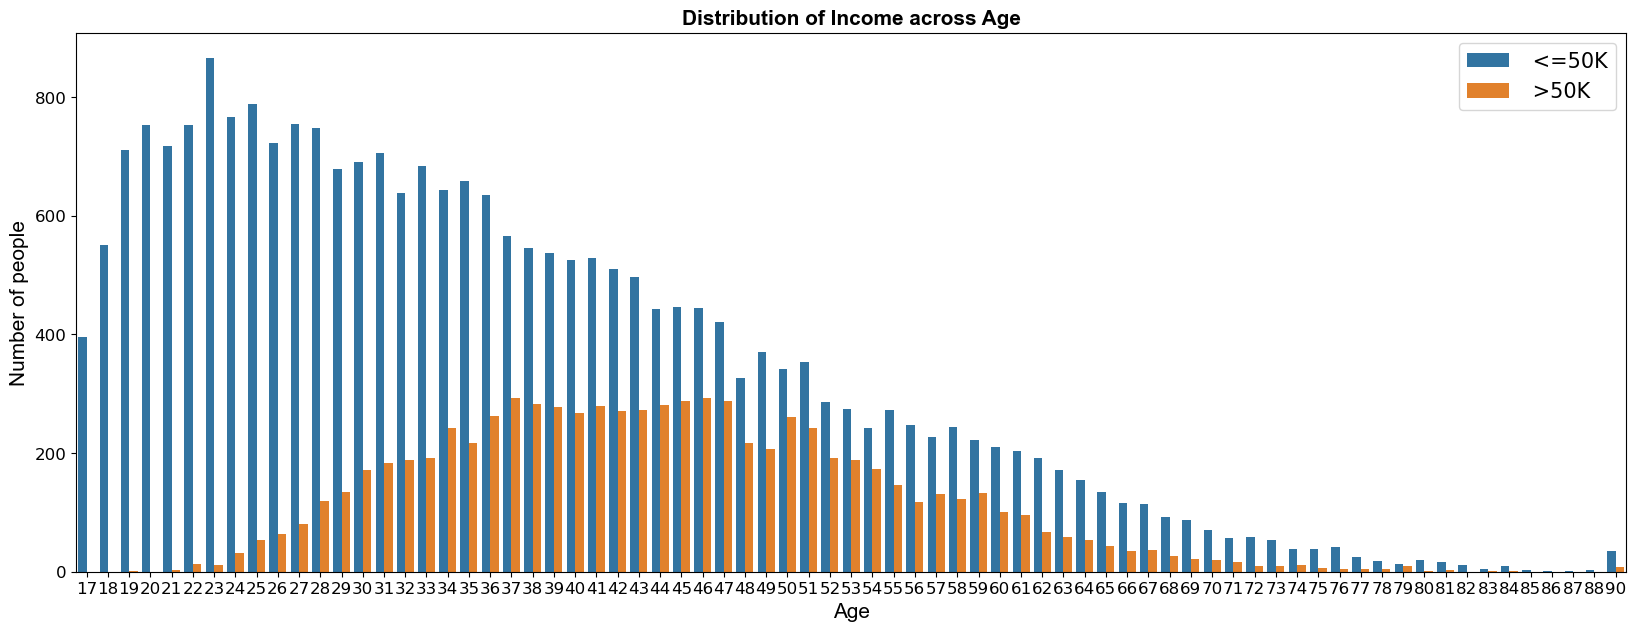

In [42]:
# Creating a countplot of income across age

plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(dt['Age'], hue=dt['Income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})

plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

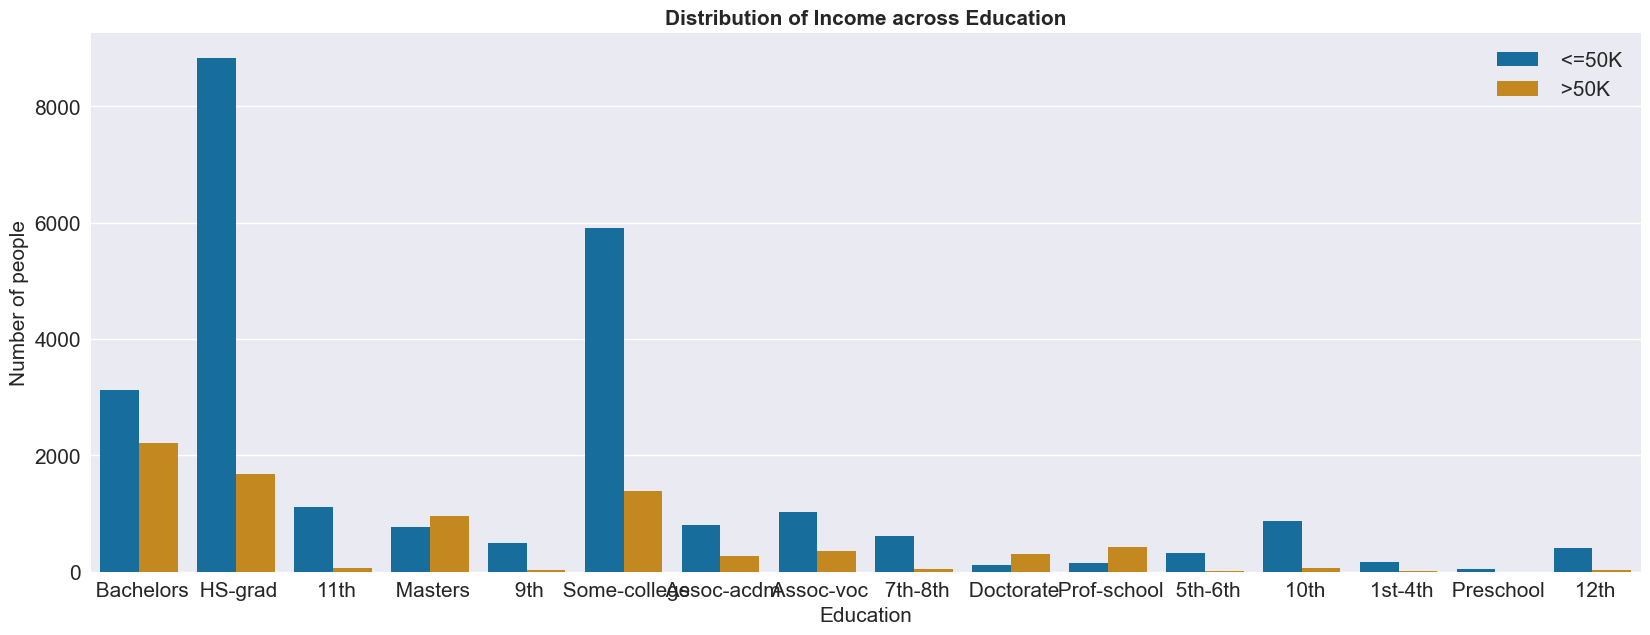

In [43]:
# Creating a countplot of income across education


plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education'],
              hue=dt['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.legend(loc=1, prop={'size': 15})
plt.show()

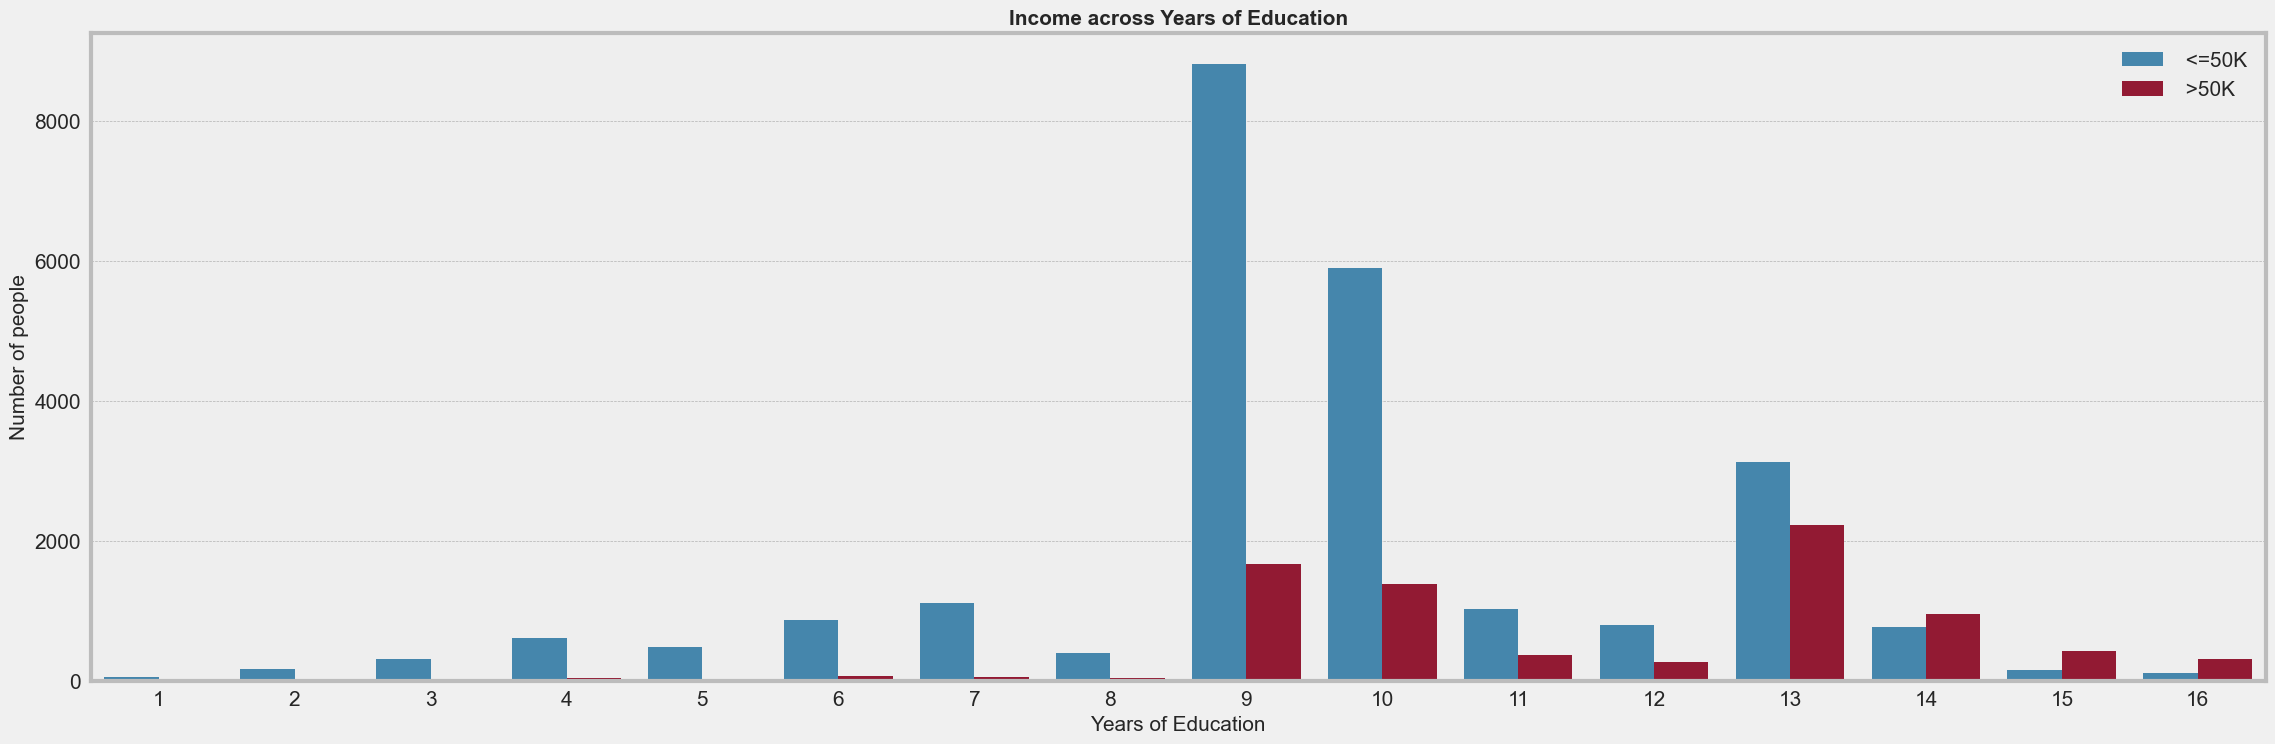

In [62]:
# Creating a countplot of income across years of education

plt.style.use('bmh')
plt.figure(figsize=(25, 8))
sns.countplot(df['Education_num'],
              hue=dt['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.legend(loc=1, prop={'size': 15})
plt.savefig(r"E:\Flip Robo\image\bi2.png")
plt.show()

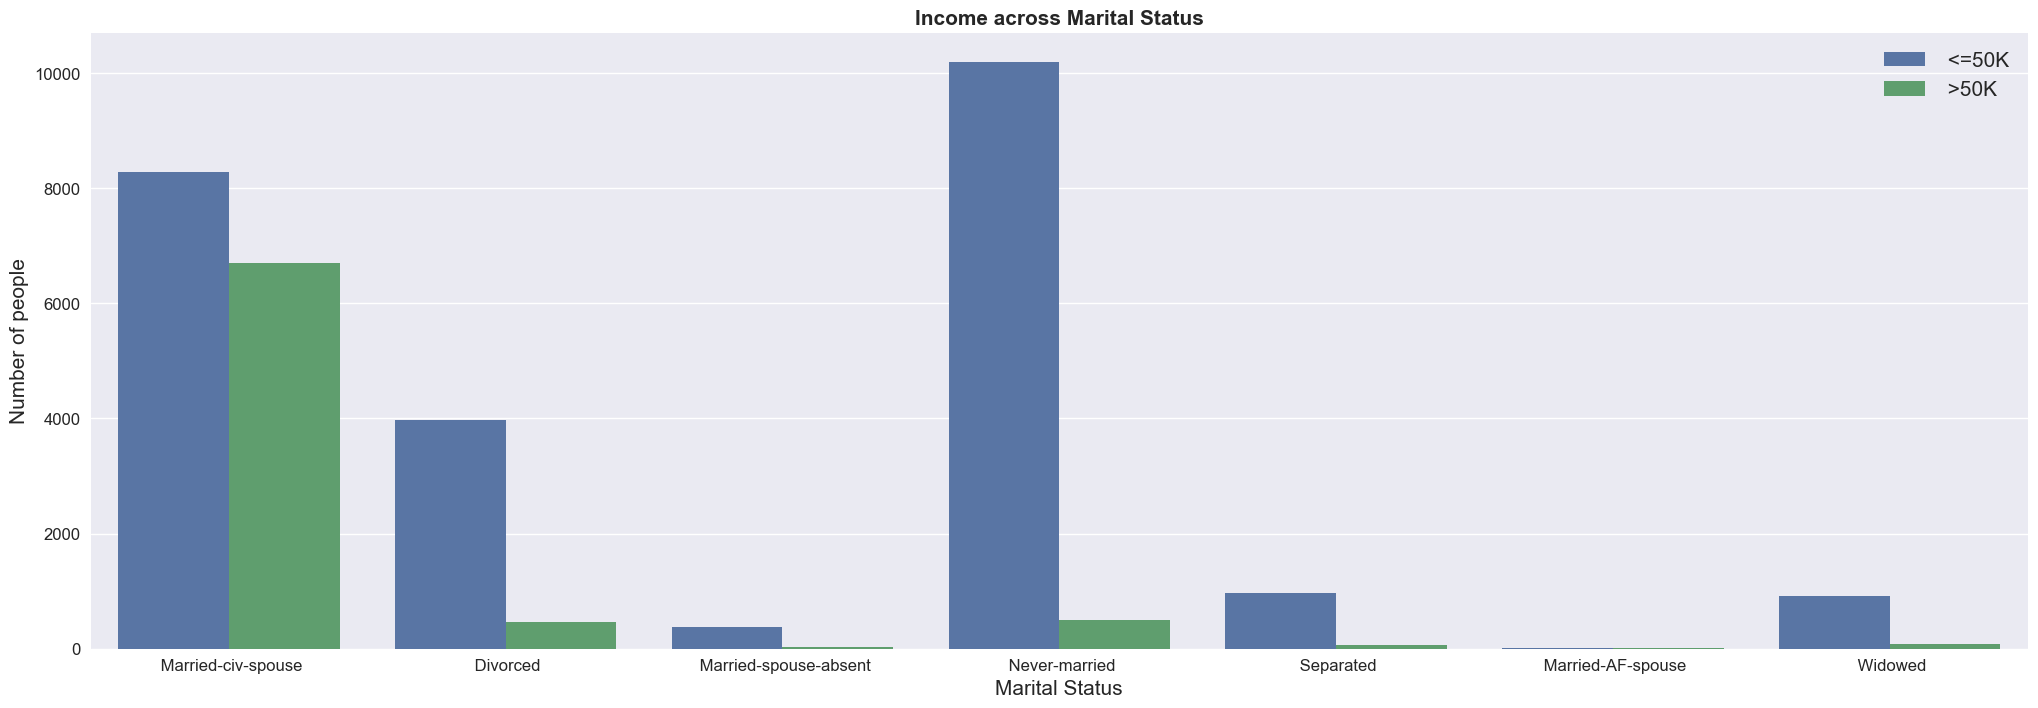

In [45]:
# Creating a countplot of income across Marital Status


plt.style.use('seaborn')
plt.figure(figsize=(25, 8))
sns.countplot(dt['Marital_status'], hue=dt['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

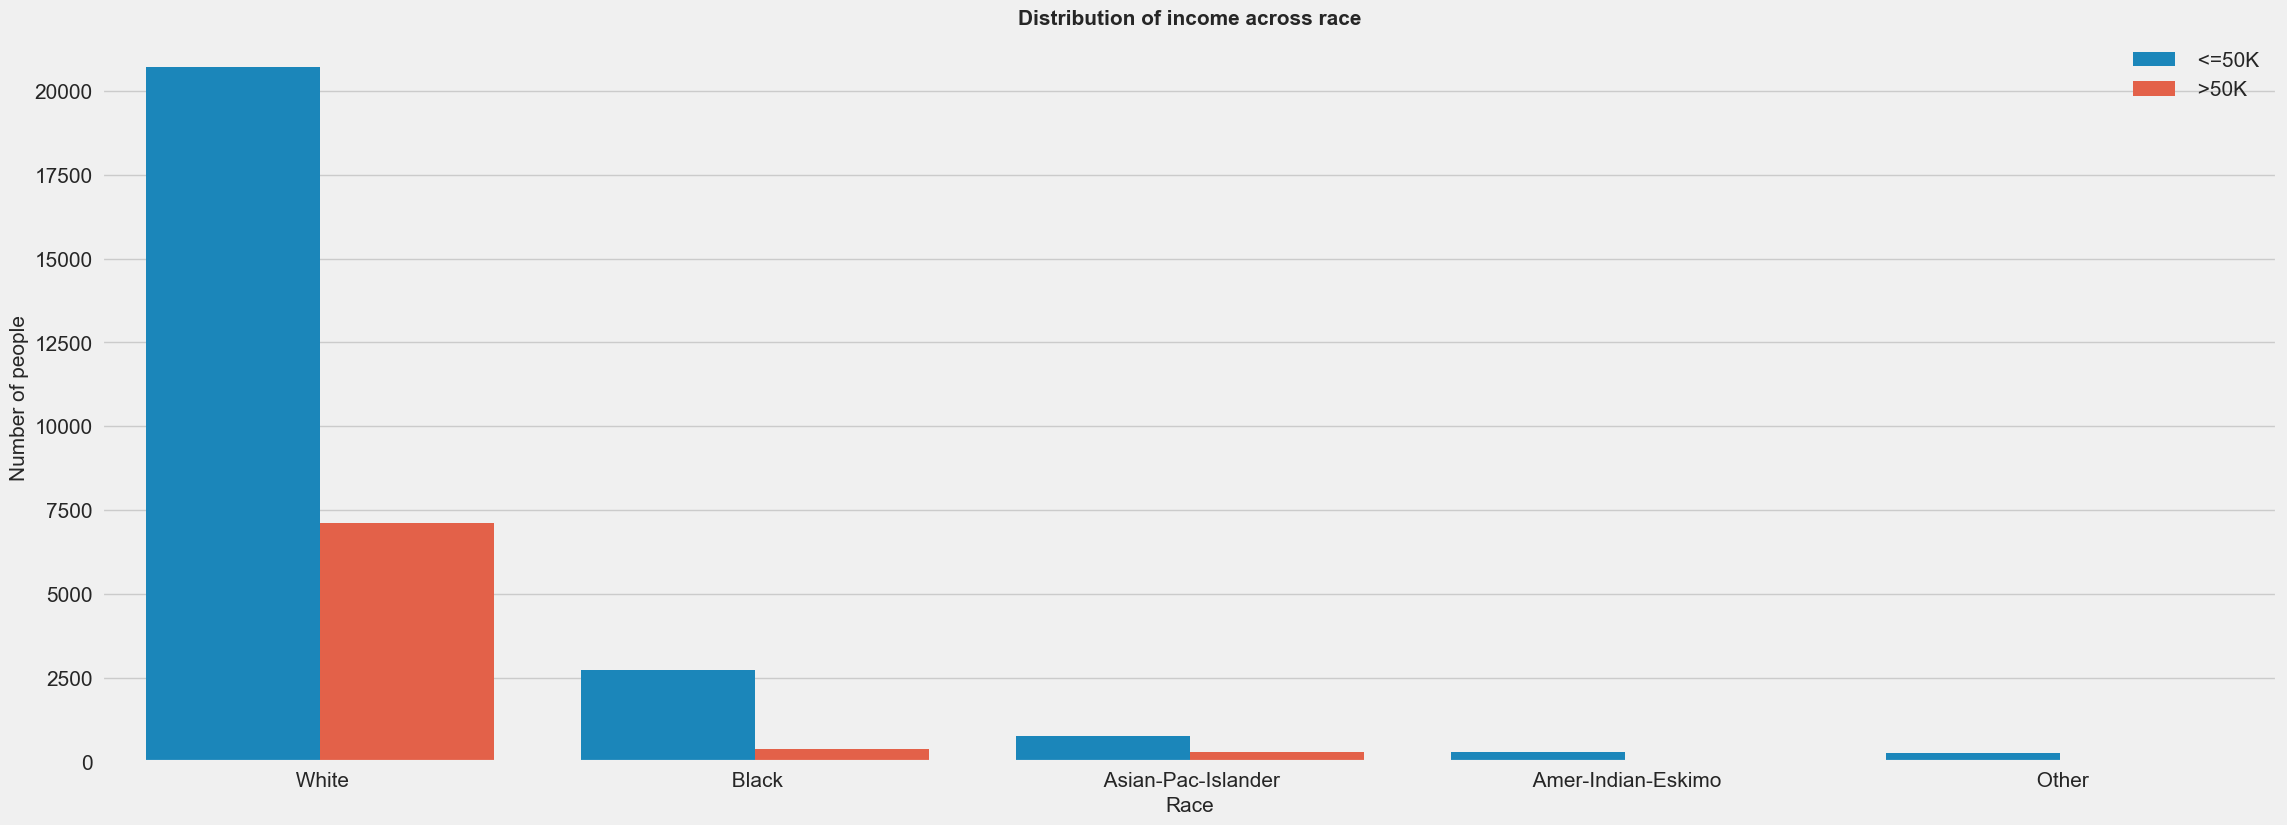

In [46]:
# Creating a countplot of income across race

plt.style.use('fivethirtyeight')
plt.figure(figsize=(25, 9))
sns.countplot(df['Race'], hue=dt['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=15)
plt.legend(loc=1, prop={'size': 15})
plt.show()

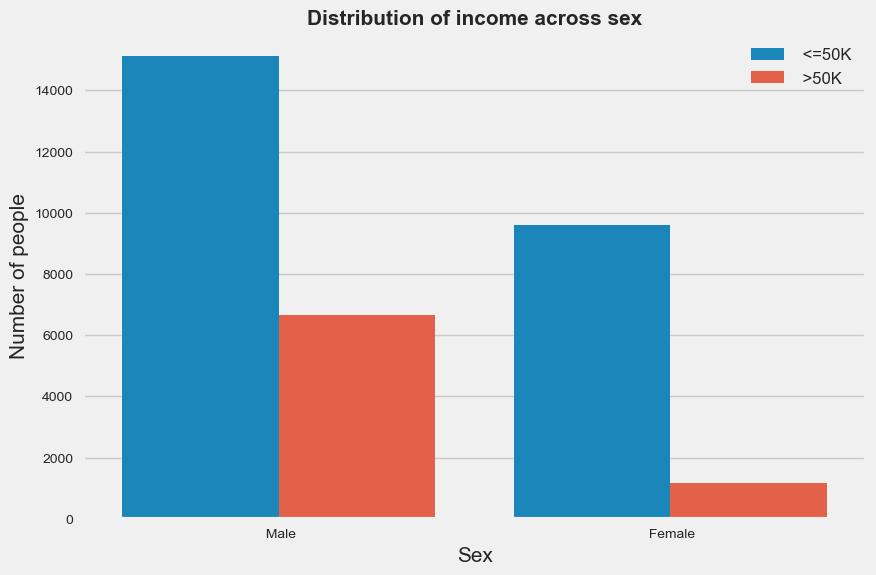

In [61]:
# Creating a countplot of income across sex


plt.style.use('fivethirtyeight')
plt.figure(figsize=(9, 6))
sns.countplot(df['Sex'], hue=dt['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Arial', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Arial', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 12})
plt.savefig(r"E:\Flip Robo\image\bi3.png")
plt.show()

# Multivariate Analysis

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
df['income'] = le.fit_transform(df['Income'])

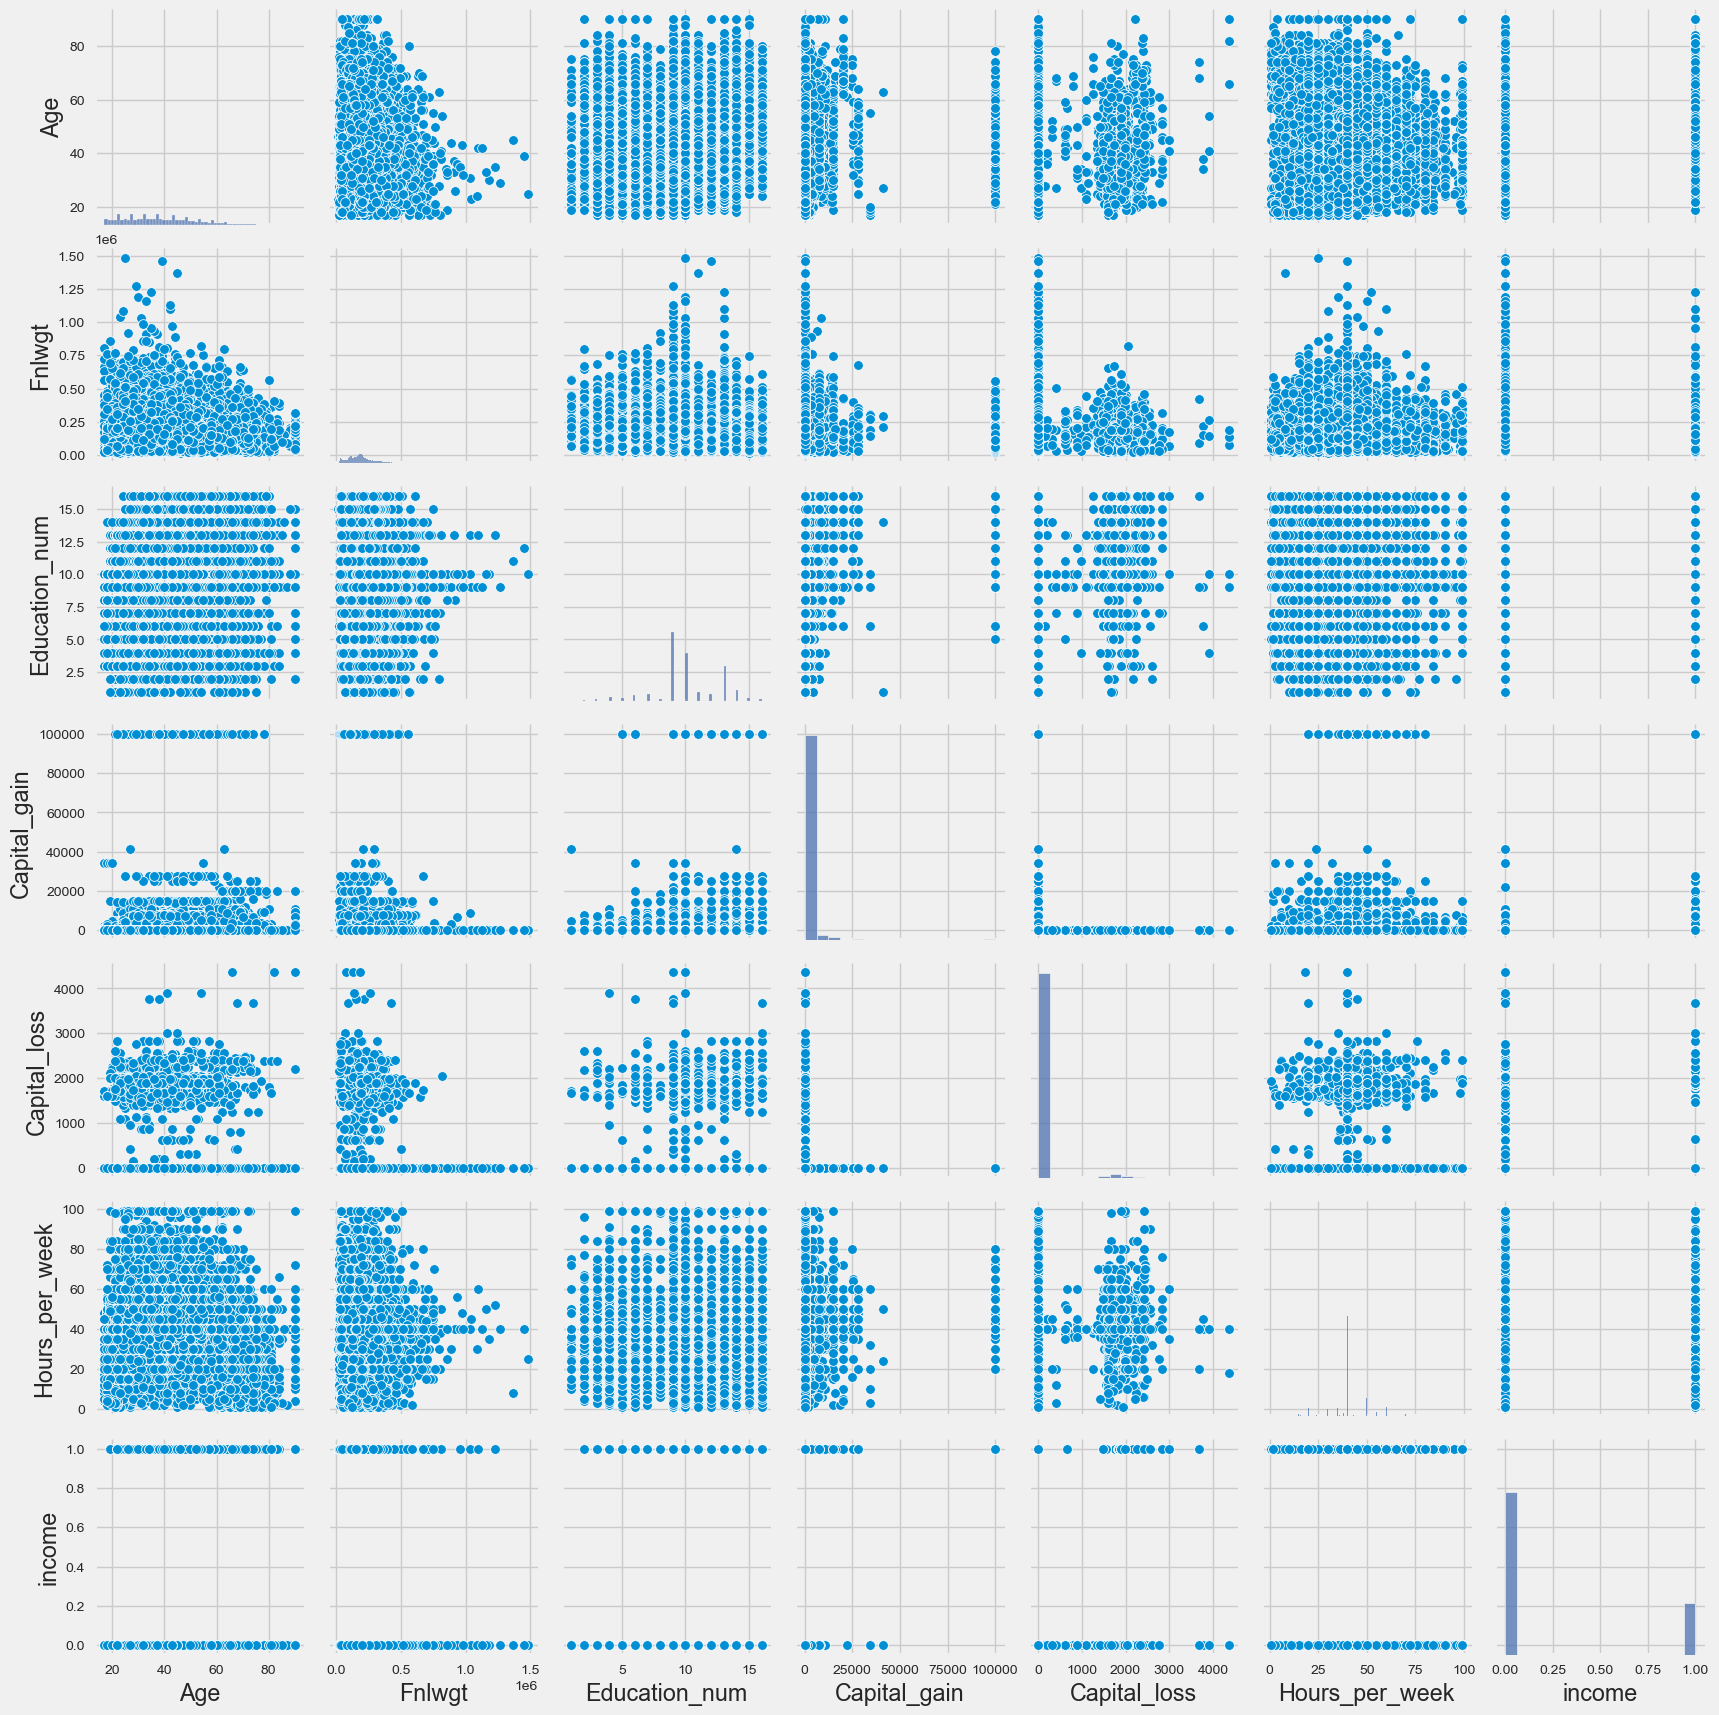

In [59]:
# Creating a pairplot of dataset

sns.pairplot(df)
plt.savefig(r"E:\Flip Robo\image\map.png")
plt.show()

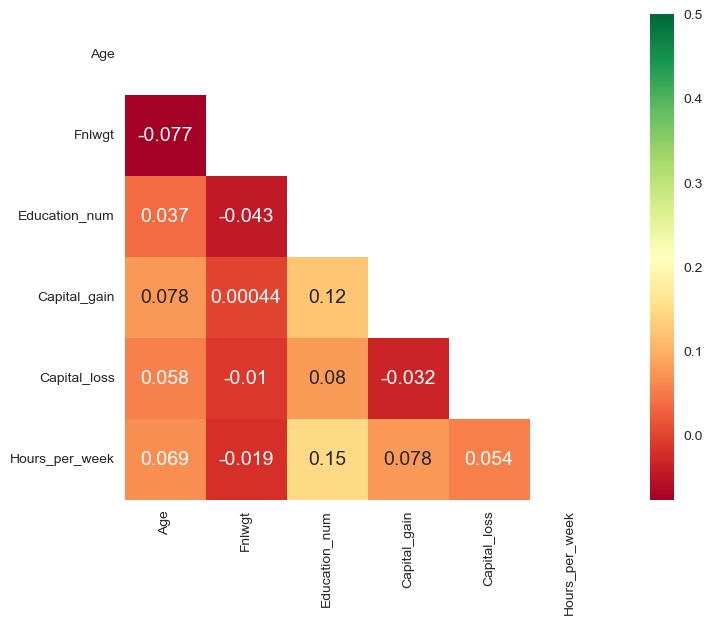

In [60]:

corr = dt.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 6))
    ax = sns.heatmap(corr, mask=mask, vmax=.5, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig(r"E:\Flip Robo\image\mah.png")
plt.show()

#### Observations:
- In this dataset, the most number of people are young, white,male, high school graduates with 9 to 10 years of education and work 40 hours per week.

- From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers ofyears of education, capital gain and number of hours per week.

# DATA PROCESSING
   

In [65]:
df = df.replace('?', np.nan)

In [66]:
# Checking null values

round((df.isnull().sum() / dt.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
income            0.0 %
dtype: object

In [67]:
columns_with_nan = ['Workclass', 'Occupation', 'Native_country']


In [68]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

# LABEL ENCODING

In [69]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(dt[col])

# FEATURE SELECTION

In [70]:
X = df.drop('income', axis=1)
Y = df['income']

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [72]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [73]:
feature_imp = selector.feature_importances_

In [74]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 1.03
1 0.09
2 0.07
3 0.55
4 1.92
5 2.56
6 0.35
7 2.64
8 0.06
9 1.27
10 1.65
11 0.4
12 0.28
13 0.03
14 87.1


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [76]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex',
            'Capital_gain', 'Native_country'], axis=1)

Fixing imbalanced dataset using Oversampling

In [77]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'


0    75.92 %
1    24.08 %
Name: income, dtype: object

# Creating a train test split

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [117]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .30, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(X_train,Y_train)
    pred = modRF.predict(X_test)
    acc  = accuracy_score(Y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.841011466011466 on random_state: 41


In [119]:
lg= LogisticRegression()
dtc=DecisionTreeClassifier()
SV =  SVC()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
adbc = AdaBoostClassifier()
gnb = GaussianNB()
etc=ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [120]:
lg.fit(X_train,Y_train)
dtc.fit(X_train,Y_train)
SV.fit(X_train,Y_train)
knn.fit(X_train,Y_train)
rfc.fit(X_train,Y_train)
adbc.fit(X_train,Y_train)
gnb.fit(X_train,Y_train)
etc.fit(X_train,Y_train)
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [121]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (22792, 9)
X_test shape: (9768, 9)
Y_train shape: (22792,)
Y_test shape: (9768,)


# Data Modelling

### Logistic Regression

In [123]:

lgpred = lg.predict(X_test)
accu = classification_report(Y_test,lgpred)

In [124]:
conf_matrx = confusion_matrix(Y_test,lgpred)
conf_matrx

array([[7084,  283],
       [2226,  175]], dtype=int64)

In [126]:
print(accu)

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      7367
           1       0.38      0.07      0.12      2401

    accuracy                           0.74      9768
   macro avg       0.57      0.52      0.49      9768
weighted avg       0.67      0.74      0.67      9768



### KNN Classifier

In [146]:
knnpred = knn.predict(X_test)
accu = classification_report(Y_test,knnpred)

In [147]:
conf_matrx = confusion_matrix(Y_test,knnpred)
conf_matrx

array([[6604,  763],
       [1926,  475]], dtype=int64)

In [148]:
print(accu)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      7367
           1       0.38      0.20      0.26      2401

    accuracy                           0.72      9768
   macro avg       0.58      0.55      0.55      9768
weighted avg       0.68      0.72      0.69      9768



### Support Vector Classifier

In [150]:
SVpred = SV.predict(X_test)
accu = classification_report(Y_test,SVpred)

In [151]:
conf_matrx = confusion_matrix(Y_test,SVpred)
conf_matrx

array([[7367,    0],
       [2401,    0]], dtype=int64)

In [152]:
print(accu)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7367
           1       0.00      0.00      0.00      2401

    accuracy                           0.75      9768
   macro avg       0.38      0.50      0.43      9768
weighted avg       0.57      0.75      0.65      9768



### Decision Tree Classifier

In [143]:
dtcpred = dtc.predict(X_test)
accu = classification_report(Y_test,dtcpred)

In [144]:
conf_matrx = confusion_matrix(Y_test,dtcpred)
conf_matrx

array([[7367,    0],
       [   0, 2401]], dtype=int64)

In [145]:
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7367
           1       1.00      1.00      1.00      2401

    accuracy                           1.00      9768
   macro avg       1.00      1.00      1.00      9768
weighted avg       1.00      1.00      1.00      9768



### Random Forest Classifier

In [153]:
rfcpred = rfc.predict(X_test)
accu = classification_report(Y_test,rfcpred)

In [154]:
conf_matrx = confusion_matrix(Y_test,rfcpred)
conf_matrx

array([[7367,    0],
       [   0, 2401]], dtype=int64)

In [155]:
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7367
           1       1.00      1.00      1.00      2401

    accuracy                           1.00      9768
   macro avg       1.00      1.00      1.00      9768
weighted avg       1.00      1.00      1.00      9768



In [159]:
from sklearn.model_selection import cross_val_score as cvs

In [161]:
print(cvs(lg,X,Y,cv=5).mean())
print(cvs(rfc,X,Y,cv=5).mean())
print(cvs(knn,X,Y,cv=5).mean())
print(cvs(SV,X,Y,cv=5).mean())

0.7812346437346437
1.0
0.7307432432432432
0.7591830466830467


## Based on comparing Accuracy Score results, we determined that Random Forest Classifier is the best model.